# Density-based spatial clustering of applications with noise (DBSCAN) 

Kmeans struggles when clusters vary in sizes, clusters being non-spherical shapes and clusters that have varying densities. Also, assigning number of clusters hyperparameter can be a tedious task which involves finding the silhouette score and the inflexion score.  

The algorith defines clusters of continous regions of high density. Specifically:

1. For each instance it counts how many instances fall within the $\epsilon$ value - i.e. the Instance's $\epsilon$- neighborhood.

2. If the number of instances within the $\epsilon$ neighborhood satisfies the min_samples parameter then it is considered a <i> core instance </i>.

3. All instances neighboring the core instances belong to the same cluster. Other core instances may also be included into the neighborhood so a long sequence of neighboring core instances forms a single cluster.

4. Any instances outside core instances and does not have a neighborhood is considered an <b> Anomaly</b>. 

In [1]:
# Load Moons Dataset - I have selected this as it contains data which is dense enough but irregular in shape.

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples= 1000, noise= 0.05, random_state=42)
dbscan = DBSCAN(eps= 0.05, min_samples=5)
dbscan.fit(X, y)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [2]:
dbscan.labels_ #shows all the labels, any -1 labels are considered anomalies.

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5,  2,  3,  0,  2,  2,  2,  4,
        2,  2,  4,  0,  5,  1,  0,  5,  5,  3,  2,  2,  2,  4,  5,  0,  6,
        1, -1,  0,  0,  2,  3, -1,  3,  4, -1,  4,  4,  2,  0,  6,  2,  0,
        2,  4,  0,  3,  3,  0,  3,  5,  2, -1,  3,  0,  5,  0,  0,  0,  2,
        3,  0,  3,  6,  0,  2,  4,  4,  0,  3,  0,  4,  0,  3, -1,  3,  4,
        0, -1,  2,  2,  4,  1,  6,  0,  5,  2,  6,  2,  3,  3, -1,  2, -1,
        2,  4,  0,  0,  0,  2,  5,  2,  0,  2, -1,  2,  3,  1,  5,  2,  0,
        4,  2,  1,  2,  4,  4,  0,  0,  6,  2,  2,  0,  2, -1,  2,  0,  3,
        3,  5, -1,  3,  3,  5,  2,  4,  2,  2,  2,  4,  2,  4,  0, -1,  2,
        1,  2,  6,  4,  2,  3,  2, -1,  2,  0,  0,  2,  0,  4,  0,  4,  4,
        1,  6,  3,  2,  6,  1,  4,  4,  2,  0,  6,  0,  1,  0,  2,  5,  1,
        1,  2,  2,  2,  2,  0,  5,  5,  1,  4,  5,  0,  3,  3,  0,  0,  0,
        2,  0,  5,  2, -1,  2,  3,  5,  2,  2,  0,  4,  0,  4,  2,  2,  4,
        2,  2,  3,  2,  3

In [3]:
len(dbscan.core_sample_indices_) # inidices of the core instances
dbscan.core_sample_indices_

array([  0,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  28,  29,  30,  31,
        32,  33,  34,  36,  38,  39,  41,  42,  44,  45,  47,  49,  50,
        51,  52,  53,  54,  55,  56,  58,  59,  61,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  83,  84,  85,  87,  88,  89,  90,  91,  93,  94,  96,
        97,  98, 102, 103, 104, 105, 106, 107, 108, 109, 110, 113, 114,
       115, 116, 117, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 135, 136, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149,
       150, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178,
       179, 181, 182, 183, 185, 186, 187, 188, 189, 191, 193, 194, 195,
       196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 22

In [4]:
dbscan.components_ #The instance values, don't forget make moons has 2 features, x1 and x2.

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [5]:
X[0] #x1, x2

array([-0.02137124,  0.40618608])

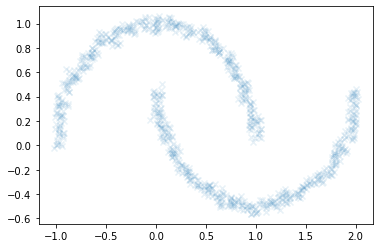

In [6]:
#plot data

import matplotlib.pyplot as plt

plt.scatter(dbscan.components_[:,0], dbscan.components_[:,1], marker='x', alpha=0.1)


In [7]:
#Take a look at the clusers

import numpy as np

core_mask = np.zeros_like(dbscan.labels_, dtype= bool) #Empty Array of False values has the same length as dbscan.labels
core_mask[dbscan.core_sample_indices_] = True #assign True to core instances only
anomalies_mask = dbscan.labels_ == -1 #assign True for all values that are anomalies 
non_core_mask = ~(core_mask | anomalies_mask) #NOT core instances OR anomalies, i.e. values in no man's land.
# dbscan.labels_
non_core_mask

array([False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False,

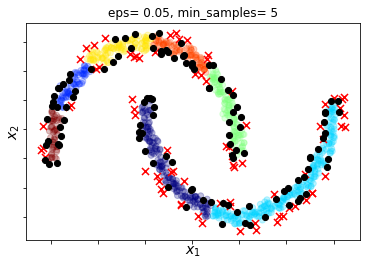

In [8]:

cores = dbscan.components_ #valus of x1, x2

anomalies = X[anomalies_mask] #x1, x2 values of ONLY anomalies
non_cores = X[non_core_mask] #x1, x2 values of ONLY no man's land instances

plt.scatter(cores[:,0], cores[:,1], c=dbscan.labels_[core_mask], marker= 'o', cmap='jet', alpha=0.25)
plt.scatter(anomalies[:,0], anomalies[:,1], c='r', marker= 'x', s=50)
plt.scatter(non_cores[:,0], non_cores[:,1], c='k', marker= '.', s=150)
plt.xlabel('$x_1$', fontsize= 14)
plt.ylabel('$x_2$', fontsize= 14)
plt.title('eps= {:.2f}, min_samples= {}'.format(dbscan.eps, dbscan.min_samples))
plt.tick_params(labelbottom=False, labelleft=False)

In [9]:
#Let copy the above across so that we can turn this into a function.


def plot_dbscan(dbscan, X):
    core_mask = np.zeros_like(dbscan.labels_, dtype= bool)
    core_mask[dbscan.core_sample_indices_] = True #assign True to core instances only
    anomalies_mask = dbscan.labels_ == -1 #assign True for all values that are anomalies 
    non_core_mask = ~(core_mask | anomalies_mask) #NOT core instances OR anomalies, i.e. values in no man's land.
    # dbscan.labels_
    non_core_mask
    cores = dbscan.components_ #valus of x1, x2

    anomalies = X[anomalies_mask] #x1, x2 values of ONLY anomalies
    non_cores = X[non_core_mask] #x1, x2 values of ONLY no man's land instances

    plt.scatter(cores[:,0], cores[:,1], c=dbscan.labels_[core_mask], marker= 'o', cmap='jet', alpha=0.25)
    plt.scatter(anomalies[:,0], anomalies[:,1], c='r', marker= 'x', s=50)
    plt.scatter(non_cores[:,0], non_cores[:,1], c='k', marker= '.', s=150)
    plt.xlabel('$x_1$', fontsize= 14)
    plt.ylabel('$x_2$', fontsize= 14)
    plt.title('eps= {:.2f}, min_samples= {}'.format(dbscan.eps, dbscan.min_samples))
    plt.tick_params(labelbottom=False, labelleft=False)

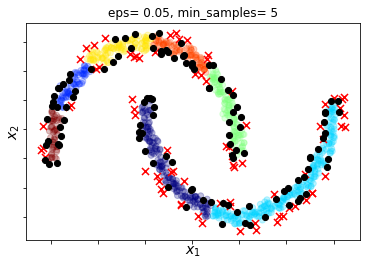

In [10]:
plot_dbscan(dbscan, X)

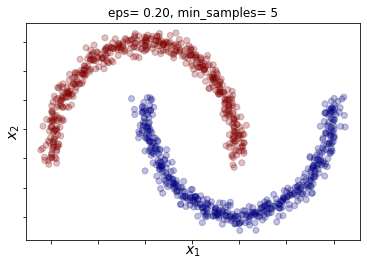

In [11]:
dbscan1 = DBSCAN(eps= 0.2, min_samples= 5)
dbscan1.fit(X, y)
plot_dbscan(dbscan1, X)

## You can see, by increasing the values of epsilon, $\epsilon$ (i.e. the neighborhood) we increase the cluster size to 2 continous clusters. 

# This also reduces the number of anomalies and instances that are not anomalies but also not in 'clusters' - no man's land instances.

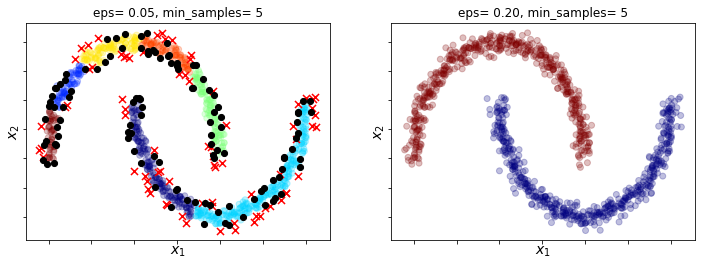

In [12]:
plt.figure(figsize= (12, 4))
plt.subplot(121)
plot_dbscan(dbscan, X)

plt.subplot(122)
plot_dbscan(dbscan1, X)

plt.show()

In [13]:
#since dbscan1 works better lets set it it the dbscan

dbscan = dbscan1


###### DBSCAN does not have the .predict() method but it does have fit_method(). It cannot predict new instances.

#### Training a KNeighborsClassifier Class, we can use the outcome of DBSCAN to see which cluster new instances would fall in.  

In [14]:
#train model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=50)
knn_clf.fit(dbscan.components_, dbscan.labels_) #x1, x2, y-labels

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [15]:
#new instances, x1, x2

X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2,1]])
# X_new

knn_clf.predict(X_new) #output is the prediction of which cluster each instance belongs to.

array([1, 0, 1, 0], dtype=int32)

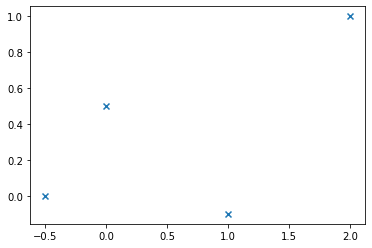

In [16]:
plt.scatter(X_new[:,0],X_new[:,1], marker= 'x') #plot the new instances on an empty graph

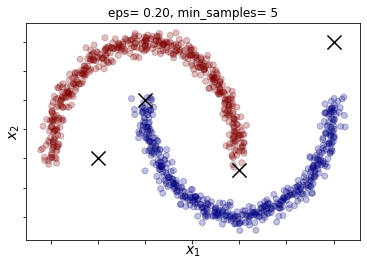

In [17]:
plot_dbscan(dbscan1, X)
plt.scatter(X_new[:,0],X_new[:,1], marker= 'x', c='k', s= 200) #plot new instances alongside DBSCAN clusters

In [18]:
y_dist, y_pred_index = knn_clf.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_index]
y_dist

array([[0.43045422],
       [0.02225568],
       [0.06010476],
       [0.48399468]])

In [19]:
y_pred

array([[1],
       [0],
       [1],
       [0]], dtype=int32)

Note since the dbscan split the data into two clusters, we have 0 and 1 core labels only. The KNeighborsClassfier puts
these instances inside cluster, as all classifier would do, even though some are far away. We can avoid this by setting
the maximum distance in which an instance is classified to be within a cluster.

In [20]:
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int32)

### DBSCAN is very simple and able to indentify clusters in any shape. 

#### Only has 2 hyperparameters: Epsilon & min_samples

However, if the instances density varies massively, then it can be difficult to obtain a clean cluster. The computational complexity is almost linear O($m$ log $m$) but if eps is large then is can be O($m^2$) memory. 

###### Other Clustering Algorithms in Sci-kit Learn
1. Agglomerative Clusering - scales nicely for large datasets but always requires a connectivity matrix - found in sklearn.neighbors.kneighbors_graph() - https://www.youtube.com/watch?v=OcoE7JlbXvY

2. Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) - sklearn.cluster.Birch - designer specifcally for very large datsets and is faster than batch K-means, as long as the number of features is not to large, <20. The approach is uses limited memory by assigning each instance to cluster inside a tree structure.

3. Mean-Shift - sklearn.cluster.MeanShift - unlike K-Means where we have to figure out the number of clusters - Mean Shift figures out how many clusters there are and where there. The algorithm shifts the circles (i.e. bandwidth) in the direction of the highest density, or until it finds a local density maximum, and the instances within and near the cirlce are assigned to the same cluster. Mean Shift is similiar to DBSCAN, in that it will find clusters of any shape and, requires 1 hyperparameter (the bandwidth, i.e. the radius of the circles). However, it is very computationally intense and not suitable for large datasets - https://www.youtube.com/watch?v=3ERPpzrDkVg 

4. Affinity Propagation - sklearn.cluster.AffinityPropagation - not suitable for large datasets - uses a voting system and can detect a number of different sized clusters.

5. Spectral Clusering - sklearn.cluster.SpectralClustering - does not scale well with large datsets and different sized clusters - It captures complex clusters by using a similiarity matrix and reducing the dimensionality of the instances, it then it uses a clustering algorithm in this low dimensional space, such as KMeans. 